Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.


In [2]:
import pandas as pd
bike_df = pd.read_csv('BIKE DETAILS.csv')
print(bike_df.head(10))
print(bike_df.shape)
print(list(bike_df.columns))


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

Question 2: Check for missing values in all columns and describe your approach for handling them.

In [3]:
missing = bike_df.isnull().sum()
missing_percent = 100 * missing / len(bike_df)
print(pd.DataFrame({'missing_count': missing, 'missing_percent': missing_percent}))


                   missing_count  missing_percent
name                           0         0.000000
selling_price                  0         0.000000
year                           0         0.000000
seller_type                    0         0.000000
owner                          0         0.000000
km_driven                      0         0.000000
ex_showroom_price            435        40.999057


Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

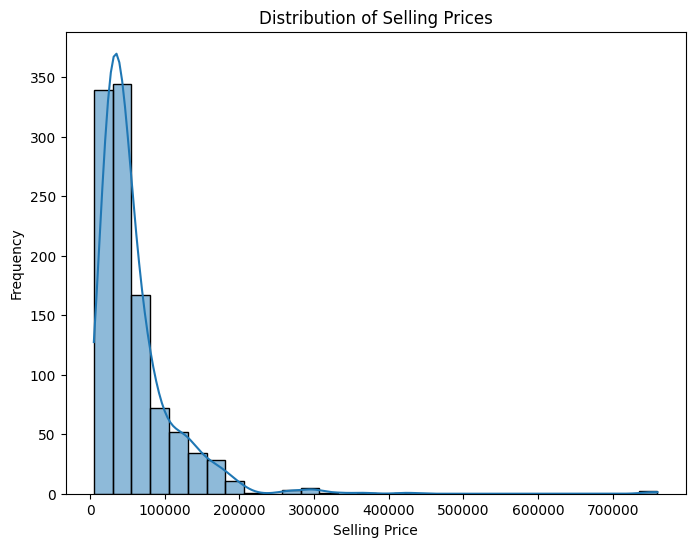

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(bike_df['selling_price'], bins=30, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()


4. Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

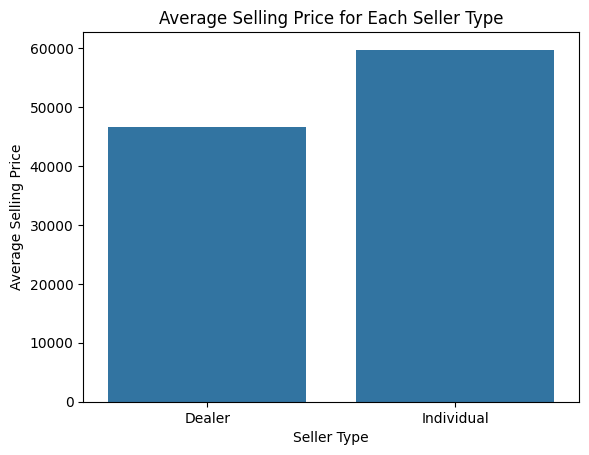

In [5]:
avg_price_by_seller = bike_df.groupby('seller_type')['selling_price'].mean().reset_index()
sns.barplot(data=avg_price_by_seller, x='seller_type', y='selling_price')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price for Each Seller Type')
plt.show()


Question 6: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

Shape before removing outliers: (1061, 7)
Shape after removing outliers: (1022, 7)


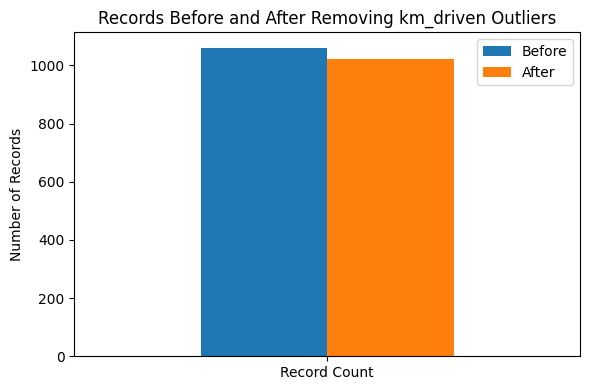

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_bike_df = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)]
print("Shape before removing outliers:", bike_df.shape)
print("Shape after removing outliers:", filtered_bike_df.shape)

bike_df = pd.read_csv('BIKE DETAILS.csv')

Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_bike_df = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)]


shapes = pd.DataFrame({'Before': [bike_df.shape[0]], 'After': [filtered_bike_df.shape[0]]}, index=['Record Count'])


ax = shapes.plot(kind='bar', figsize=(6, 4))
ax.set_title('Records Before and After Removing km_driven Outliers')
ax.set_ylabel('Number of Records')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

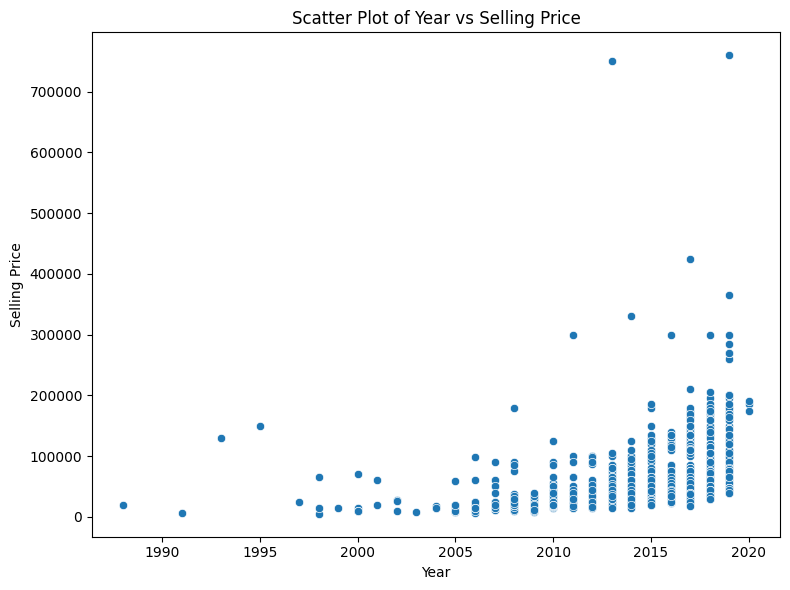

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


bike_df = pd.read_csv('BIKE DETAILS.csv')


Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_bike_df = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)]


plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_bike_df, x='year', y='selling_price')
plt.title('Scatter Plot of Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

In [10]:
import pandas as pd

bike_df = pd.read_csv('BIKE DETAILS.csv')
one_hot_encoded_df = pd.get_dummies(bike_df, columns=['seller_type'], drop_first=True)

print(one_hot_encoded_df.columns)


Index(['name', 'selling_price', 'year', 'owner', 'km_driven',
       'ex_showroom_price', 'seller_type_Individual'],
      dtype='object')


Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

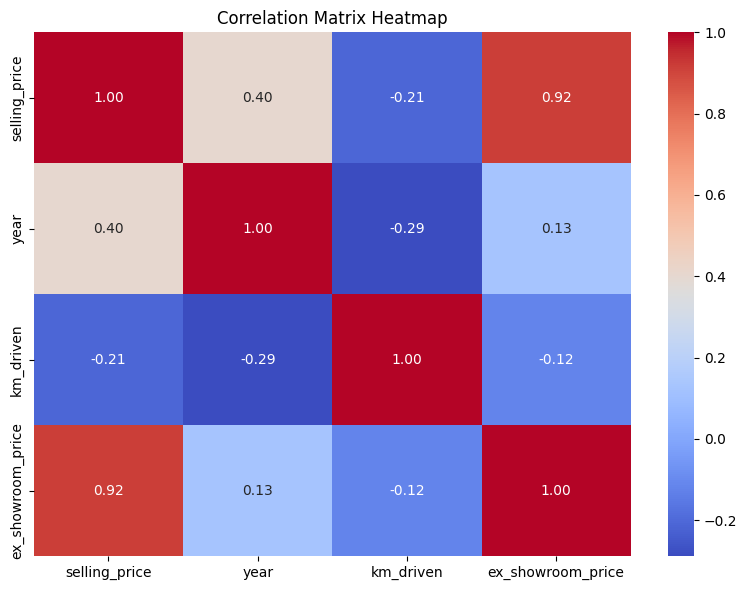

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bike_df = pd.read_csv('BIKE DETAILS.csv')


numeric_df = bike_df.select_dtypes(include=['number'])


correlation_matrix = numeric_df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


 Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

Answer : Important Factors Affecting a Bike's Selling Price
The original ex-showroom price of the bike is the most important factor influencing the selling price.

The year of manufacture is significant; newer bikes tend to sell at higher prices.

Kilometers driven has a negative effect; the more the kilometers, the lower the resale price.

Bikes sold by individual sellers tend to have a higher average selling price compared to dealers.


Data Cleaning and Feature Engineering Performed
Missing Values: Imputed missing values in the ex_showroom_price column using the median to avoid data loss.

Outlier Removal: Used the Interquartile Range (IQR) method to remove outliers from the km_driven feature to ensure more accurate analysis.

Categorical Encoding: Converted the seller_type column to numerical format using one-hot encoding (dummy variables) for easier model application.

Data Visualization: Used various plots such as histograms, scatter plots, bar charts, and heatmaps to visualize relationships among features and understand data trends.